<a href="https://colab.research.google.com/github/Sampurnasit/NOTES/blob/main/HOUSEPRICE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("/content/train_dataset.txt")
test = pd.read_csv("/content/test_dataset.txt")

In [7]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [9]:
train = train.drop(["Unnamed: 0","Id"],axis=1)
test = test.drop(["Unnamed: 0","Id"],axis=1)

In [10]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [11]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,10400,1,3,3,0,0,0,5,...,0,0,0,0,0,3,2009,8,4,12.195517
1,50,4,6000,1,3,3,0,0,0,3,...,208,0,0,0,0,5,2009,8,4,11.669929
2,20,3,9750,1,3,3,0,4,0,5,...,0,0,0,0,0,10,2009,8,4,12.269047
3,20,3,10140,1,3,3,0,4,0,14,...,0,0,0,0,0,7,2006,8,4,11.941456
4,20,3,14684,1,0,3,0,1,0,20,...,0,0,0,0,0,6,2009,8,4,12.513190


In [12]:
train_data = train.values
Y = train_data[:,-1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]

In [16]:
test_data = test.values
test_Y = test_data[:,-1].reshape(test_data.shape[0],1)
test_X = test_data[:,:-1]

In [17]:
print("Shape of X_train is:",X.shape)
print("Shape of Y_train is:",Y.shape)
print("Shape of X_test is:",test_X.shape)
print("Shape of Y_test is:",test_Y.shape)

Shape of X_train is: (258, 69)
Shape of Y_train is: (258, 1)
Shape of X_test is: (258, 69)
Shape of Y_test is: (258, 1)


In [48]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
test_X = np.vstack((np.ones((test_X.shape[0], )), test_X.T)).T

In [34]:
def model(X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
    print(f"Iteration {i+1}: Cost is {cost}")
  return theta, cost_list

In [40]:
iteration = 100
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration = iteration)

Iteration 1: Cost is 72.33487433639091
Iteration 2: Cost is 16.855047447205745
Iteration 3: Cost is 12.12785674045506
Iteration 4: Cost is 11.44325178345816
Iteration 5: Cost is 11.088886646265063
Iteration 6: Cost is 10.769477877908395
Iteration 7: Cost is 10.4613057268236
Iteration 8: Cost is 10.162239150742918
Iteration 9: Cost is 9.871869932354358
Iteration 10: Cost is 9.589933716771393
Iteration 11: Cost is 9.31618432825347
Iteration 12: Cost is 9.050383585824227
Iteration 13: Cost is 8.792300303368751
Iteration 14: Cost is 8.541710025170328
Iteration 15: Cost is 8.298394825274626
Iteration 16: Cost is 8.062143117151606
Iteration 17: Cost is 7.832749469248861
Iteration 18: Cost is 7.610014425938823
Iteration 19: Cost is 7.393744333676915
Iteration 20: Cost is 7.183751172217019
Iteration 21: Cost is 6.9798523907369585
Iteration 22: Cost is 6.781870748731163
Iteration 23: Cost is 6.589634161531855
Iteration 24: Cost is 6.402975550324074
Iteration 25: Cost is 6.2217326965238
Iteratio

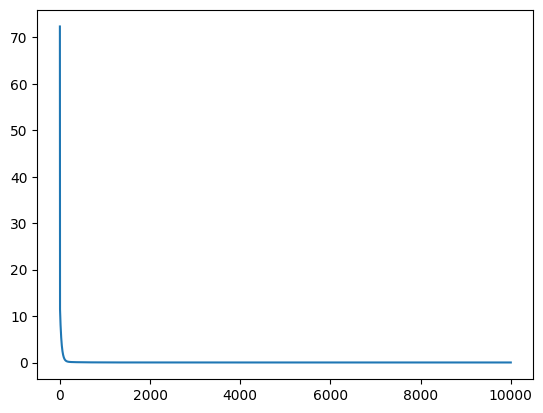

In [38]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()